In [ ]:
# Import necessary libraries
import os
import datetime
import datetime as dt
from collections import defaultdict
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import ipywidgets as widgets
import time


In [ ]:
# load data
df = pd.read_csv("./merged_cleaned_FE_imputed(v).csv")
df['Date'] = pd.to_datetime(df['Date'])
# Pivot the data so that the columns represent each product
df_pivot = df.pivot_table(index=['Date','Month', 'DayoftheMonth', 'WeekoftheMonth', 'DayoftheWeek',
       'WeekoftheYear', 'DayoftheYear', 'isWeekend', 'isWeekStart',
       'isWeekEnd', 'isMonthStart', 'isMonthEnd', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'isHoliday','StoreID'], columns=['ProductID'], values='Quantity')

# Calculate the total quantity sold per day
df_pivot['total_quantity_day'] = df_pivot.sum(axis=1)
df_pivot = df_pivot.reset_index()
# Convert all column names to string
df_pivot.columns = df_pivot.columns.astype(str)

# Convert binary columns to integer type
df = df_pivot
df['isWeekStart'] = df['isWeekStart'].astype(int)
df['isWeekEnd'] = df['isWeekEnd'].astype(int)
df['isMonthStart'] = df['isMonthStart'].astype(int)
df['isMonthEnd'] = df['isMonthEnd'].astype(int)
df['isWeekend'] = df['isWeekend'].astype(int)
df['isHoliday'] = df['isHoliday'].astype(int)

# Load the menu csv file which contains the information about the sushi products
menu_df = pd.read_csv("./Sushi Menu.csv")

In [ ]:

# Ask for user input
# Get store ID and double check if it is correct
store_id = int(input("Enter the store id (4051653300272/4051653300319): "))
while store_id != 4051653300272 and store_id != 4051653300319:
  store_id = int(input("Enter the store id: "))

# Create a list of all prod ids (prod ids start with 42)
prod_ids = []
for e in df.columns:
    if e.startswith("42"):
      prod_ids.append(e)

# Ask user how many products to plot and double check the input
# (the user can choose a number of products or all existing products)
valid_num_products = False
while not valid_num_products:
  num_products = input(f"Enter number of products to plot (1 to {len(prod_ids)}) or 'all': ")
  if num_products == "all":
    valid_num_products = True
  else:
    try:
      num_products = int(num_products)
      if 1 <= num_products <= len(prod_ids):
        valid_num_products = True
    except:
      pass
# If the user chooses a number of products, we get their EANs
# For each input EAN we double check that it is a valid EAN.
if isinstance(num_products, int):
  prod_nums = []
  for i in range(num_products): 
      prod_num = input(f"Enter product EAN number {i+1}: ")        
      while len(menu_df[menu_df["EAN"]==prod_num]["Nummer"]) == 0:
        prod_num = input(f"Enter product EAN number {i+1}: ")
      prod_nums.append(prod_num)
  prod_ids = []
  for prod_num in prod_nums:
    tmp_id = str(list(menu_df[menu_df["EAN"]==prod_num]["Nummer"])[0])
    if tmp_id not in df.columns: 
      print(f"The product ID {tmp_id} was not found in the dataset.")
      continue
    prod_ids.append(tmp_id)

# Prompt user to select date range resolution
print("For dates choose one of the following options:")
print("1) All available data")
print("2) Query a specific year")
print("3) Query from specific month to another specific month")
print("4) Query from specific date to another specific date")
option_date = int(input("Enter your choice:"))

# Validate user input for date range
while option_date < 1 or option_date > 4:
  option_date = int(input("Enter your choice:"))

# If the user chooses all dates we get the minimum and maximum dates from the dataframe.
if option_date == 1:
  start_date = min(df["Date"])
  end_date = max(df["Date"])
# If the user chooses to query a specific year we need to ask for the year number.
elif option_date == 2:
  year = int(input("Enter the year to query:"))
  start_date = f"{year}-01-01"
  end_date = f"{year}-12-31"
  start_date = dt.datetime.strptime(start_date, "%Y-%m-%d")
  end_date = dt.datetime.strptime(end_date, "%Y-%m-%d")
# If the user chooses to query between two specific months we need to get and validate them.
elif option_date == 3:
  start_date = input("Enter start month (YYYY-MM): ")
  while True:
    try:
      start_date = dt.datetime.strptime(start_date, "%Y-%m")
      break
    except:
      start_date = input("Enter start month (YYYY-MM): ")
  end_date = input("Enter end month (YYYY-MM) and higher than start month: ")
  while True:
    try:
      end_date = dt.datetime.strptime(end_date, "%Y-%m")
      if end_date > start_date:
        break
    except:
      end_date = input("Enter end month (YYYY-MM) and higher than start month: ")
# If the user chooses to query between two specific dates we need to get and validate them.
elif option_date == 4:
  valid_dates = False
  start_date = input("Enter start date (YYYY-MM-DD): ")
  while True:
    try:
      start_date = dt.datetime.strptime(start_date, "%Y-%m-%d")
      break
    except:
      start_date = input("Enter start date (YYYY-MM-DD): ")
  end_date = input("Enter end date (YYYY-MM-DD) and higher than start date: ")
  while True:
    try:
      end_date = dt.datetime.strptime(end_date, "%Y-%m-%d")
      if end_date > start_date:
        break
    except:
      end_date = input("Enter end date (YYYY-MM-DD) and higher than start date: ")

# Prompt user to select resolution for sales data plot (day or week)
resolution = input("Enter resolution (day/week): ")
while resolution != "day" and resolution != "week":
    resolution = input("Enter resolution (day/week): ")
# Filter dataframe to include only selected date range and store ID
df = df[(df["Date"] >= start_date) & (df["Date"] <= end_date) & (df["StoreID"]==store_id)]  
df = df[["Date","WeekoftheYear"] + prod_ids]

Enter the store id (4051653300272/4051653300319): 4051653300319
Enter number of products to plot (1 to 56) or 'all': 2
Enter product EAN number 1: M01
Enter product EAN number 2: M.30
The product ID 4260705920386 was not found in the dataset.
For dates choose one of the following options:
1) All available data
2) Query a specific year
3) Query from specific month to another specific month
4) Query from specific date to another specific date
Enter your choice:1
Enter resolution (day/week): day


In [ ]:
# Set end date to be inclusive, and calculate the number of days between start and end date
end_date = end_date + dt.timedelta(days=1)
diff = end_date - start_date
diff = diff.days
diff

272

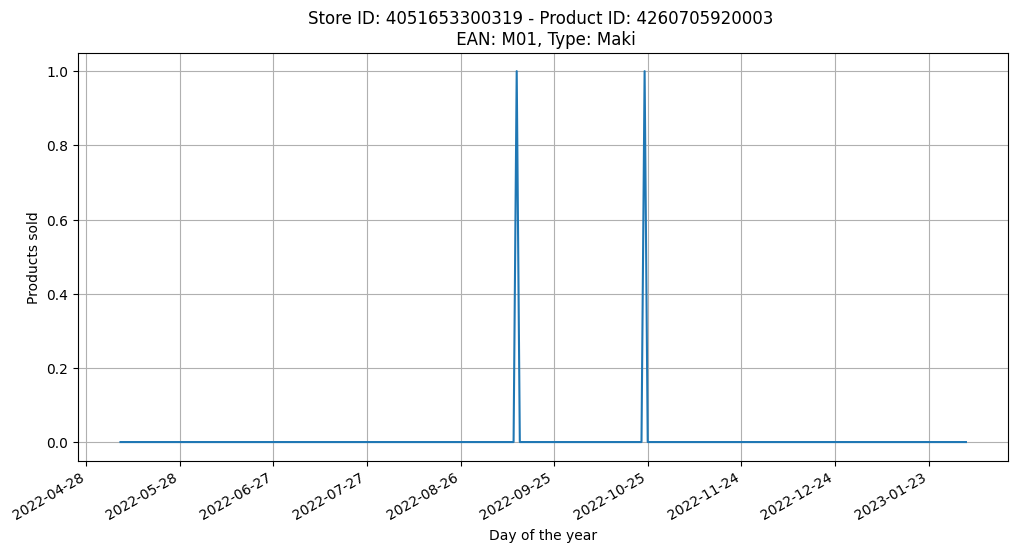

In [ ]:
# Create a nested dictionary to hold the sales data for each product on each day
sales_data = defaultdict(lambda: defaultdict(int))
# If resolution is "day", loop through the rows in the dataframe and populate the sales_data dictionary
if resolution == "day":
  for idx, row in df.iterrows():
    for prod_id in prod_ids:
      if prod_id not in row:
        print(f"The product ID {prod_id} was not found in the dataset.")
        continue
      sales_data[prod_id][df["Date"][idx]] += row[prod_id]
 # For each product, create a plot of the number of products sold per day
  for prod_id in prod_ids:
      fig, ax = plt.subplots(figsize=(12, 6))
  
      # Check if the product exists in the menu dataframe
      if len(menu_df[menu_df["Nummer"]==int(prod_id)]) == 0:
        print(f"{prod_id}`does not exist in sushi")
        continue
      # Get the EAN and type of the product from the menu dataframe
      ean = list(menu_df[menu_df["Nummer"] == int(prod_id)].to_dict()["EAN"].values())[0]
      typ = list(menu_df[menu_df["Nummer"] == int(prod_id)].to_dict()["Type"].values())[0]
      # Set the plot labels and title
      ax.set_xlabel("Day of the year")
      ax.set_ylabel("Products sold")
      ax.set_title(f"Store ID: {store_id} - Product ID: {prod_id} \n EAN: {ean}, Type: {typ}")
      ax.grid(True)
      # Get the sales data for this product
      tmp_dico = sales_data[prod_id]
      if len(tmp_dico)==0:
        continue
      values = list(tmp_dico.values())
      # If the first sale date is after the start date, pad the values with 0s
      if min(list(tmp_dico.keys())) > start_date:
        diff_before = min(list(tmp_dico.keys()))-start_date
        values = [0.0]*diff_before.days + values
      # If the last sale date is before the end date, pad the values with 0s
      if max(list(tmp_dico.keys())) < end_date:
        diff_after = end_date - max(list(tmp_dico.keys()))
        diff_after = diff_after.days - 1
        values = values + [0.0]*diff_after
      
      # Create the x-axis range and format it
      days = mdates.drange(start_date,end_date,dt.timedelta(days=1))
      fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
      fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
      
      # Plot the values and save the plot
      plt.plot(days, values)
      plt.gcf().autofmt_xdate()
      if not os.path.exists("./plots"): os.mkdir("./plots")
      fig.savefig(f"./plots/{prod_id}_day.png", dpi=300, bbox_inches='tight')
      plt.show()
      plt.close(fig)

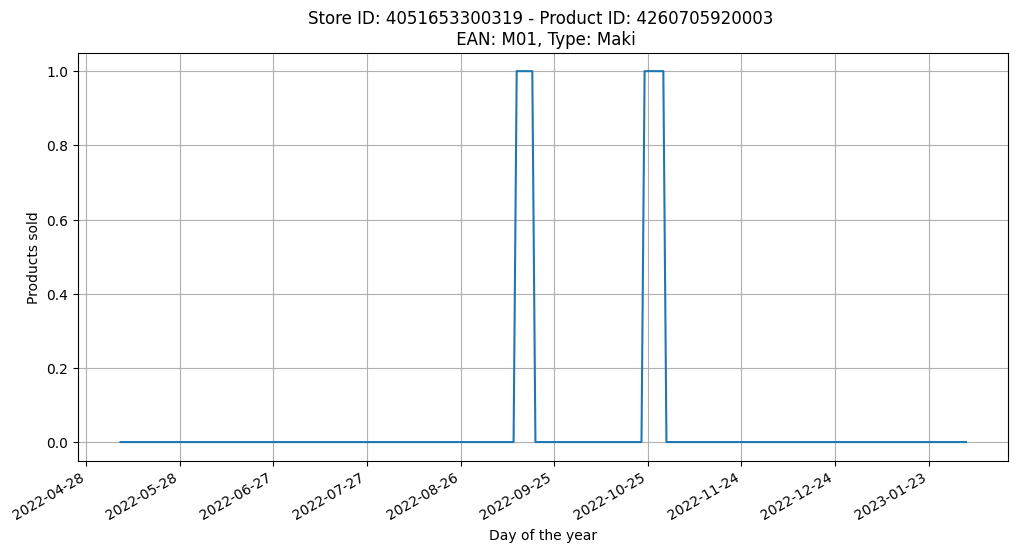

In [ ]:
# Initialize a nested defaultdict to store the cumulative sales data for each product and date
sales_data = defaultdict(lambda: defaultdict(int))

# Iterate through each row in the dataframe
for idx, row in df.iterrows():
  # Iterate through each product ID
  for prod_id in prod_ids:
    if prod_id not in row:
      print(f"The product ID {prod_id} was not found in the dataset.")
      continue
    # Add the sales amount for the current product ID and date to the sales data dictionary
    sales_data[prod_id][df["Date"][idx]] += row[prod_id]

# Iterate through each product ID
for prod_id in prod_ids:

    # Create a new figure and axis for each product ID
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Check if the product ID exists in the menu dataframe, and print an error message if not
    if len(menu_df[menu_df["Nummer"]==int(prod_id)]) == 0:
      print(f"{prod_id}`does not exist in sushi")
      continue
    # Get the EAN and type of the current product ID from the menu dataframe
    ean = list(menu_df[menu_df["Nummer"] == int(prod_id)].to_dict()["EAN"].values())[0]
    typ = list(menu_df[menu_df["Nummer"] == int(prod_id)].to_dict()["Type"].values())[0]

    # Set the x and y labels and title of the plot
    ax.set_xlabel("Day of the year")
    ax.set_ylabel("Products sold")
    ax.set_title(f"Store ID: {store_id} - Product ID: {prod_id} \n EAN: {ean}, Type: {typ}")
    
    # Add a grid to the plot
    ax.grid(True)
    # Get the sales data for the current product ID
    tmp_dico = sales_data[prod_id]
    if len(tmp_dico)==0:
      continue
    
    # Calculate the number of days before the start date and pad the sales data with zeros
    diff_before = min(list(tmp_dico.keys()))-start_date
    values = list(tmp_dico.values())
    values = [0.0]*diff_before.days + values

    # Calculate the weekly cumulative sales data
    new_values = []
    cumul = 0
    for i, e in enumerate(values):
      if i % 7 == 0:
        cumul = 0
      cumul += e
      new_values.append(cumul)
    
    # Get a range of days from the start date to the end date
    days = mdates.drange(start_date,end_date,dt.timedelta(days=1))

    # Set the date format and interval for the x-axis
    fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    
    # Plot the weekly cumulative sales data
    plt.plot(days, new_values)
    # Format the x-axis tick labels
    plt.gcf().autofmt_xdate()
    
    # Create a directory for the output plots if it does not exist
    if not os.path.exists(f"./plots_cumul_weekly"): os.mkdir(f"./plots_cumul_weekly")
    # Save the plot as a PNG image and show it
    fig.savefig(f"./plots_cumul_weekly/{prod_id}_daycumul.png", dpi=300, bbox_inches='tight')
    plt.show()
    # Close the figure to free up memory
    plt.close(fig)